Insurance dataset is a data set about predicting the amount of insurance to pay for a patient, which includes the following features:
- age: Age of the patient, is a positive integer value
- sex: Patient's gender where 0 is male, 1 is female
- bmi: The patient's BMI, is the actual value
- children: Number of children of the patient, is a positive integer value
- smoker: Indicates whether the patient smokes, where 1 is yes and 0 is no
- region: Indicate the region the patient is in, 0 is southwest 1 is southeast 2 is northwest and 3 is northeast

- charges: Individual medical costs billed by health insurance.

In [1]:
#$!pip install seaborn

In [2]:
# mount data from google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [3]:
# read data using Pandas DataFrame
def read_dataset(path):
    # read data using Pandas DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [4]:
df = read_dataset("C:\\Users\\Phu\\OneDrive - VNU-HCMUS\\TH_ML\\Week 01\\Insurance.csv")

,age,sex,bmi,children,smoker,region,charges
0,43,female,25.800,0,yes,northwest,31128.291496
1,43,female,28.600,2,no,southwest,8739.200017
2,34,female,37.290,4,no,northeast,10979.246131
3,50,female,42.370,3,no,southeast,15278.753423
4,26,female,29.595,1,no,northeast,5153.591905


,age,bmi,children,charges
count,59333.000000,59333.000000,59333.000000,59333.000000
mean,40.791448,30.930536,1.107411,13459.312130
std,13.897712,6.121275,1.455713,10175.464573
min,18.000000,15.815000,-1.000000,0.375242
25%,28.000000,26.510000,0.000000,6449.205453
50%,42.000000,30.600000,1.000000,10570.434369
75%,52.000000,35.000000,2.000000,15058.323202
max,65.000000,54.130000,6.000000,63770.428010


## Data Analysis

<AxesSubplot:>

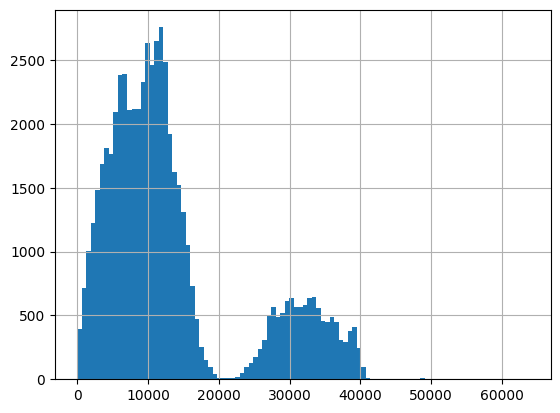

In [5]:
df["charges"].hist(bins=100)

<AxesSubplot:xlabel='charges', ylabel='Count'>

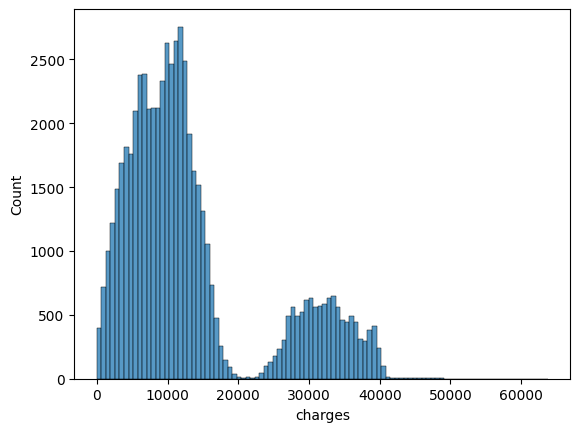

In [6]:
import seaborn as sns
sns.histplot(x="charges", data=df, bins=100)

In [7]:
# Null checking
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()
#df.duplicated().values.any()


68

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Preprocessing

In [10]:
# --- (Optional) Drop null datapoints or fill missing data
# print("Sample size:", len(df))
# df = df.dropna() <=> df.dropna(inplace=True)
# df = df.dropna()
# print("Not null sample size:", len(df))

In [11]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    if df.isnull().values.any():
        df = df.dropna() # Drop null values
    if df.duplicated().values.any():
        df = df.drop_duplicates() # Drop duplicated rows    
    df = df
    return df

In [2]:
df = preprocessing_data(df.copy())

NameError: name 'preprocessing_data' is not defined

## Feature Engineering

In [1]:
print(df.dtypes)


NameError: name 'df' is not defined

In [13]:
object_cols = df.select_dtypes(include='object').columns
# object = categorical for some time
#print(df.dtypes)

for col in object_cols:
    unique_values = df[col].unique()
    print(f"Unique values of {col}: {unique_values}")

Unique values of sex: ['female' 'male']
Unique values of smoker: ['yes' 'no']
Unique values of region: ['northwest' 'southwest' 'northeast' 'southeast']


In [14]:
# ---- Method 1
start_time = time.time()
# data normalization
normalized_data = df.copy()
normalized_data["sex"] = normalized_data["sex"].apply(lambda x: 0 if x=="male" else 1)
normalized_data["smoker"] = normalized_data["smoker"].apply(lambda x: 0 if x=="no" else 1)
normalized_data["region"] = normalized_data["region"].apply(lambda x: 0 if x=="southwest" else 1 if x=="southeast" else 2 if x=="northwest"else 3 )
normalized_data

display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)

,age,sex,bmi,children,smoker,region,charges
0,43,1,25.800,0,1,2,31128.291496
1,43,1,28.600,2,0,0,8739.200017
2,34,1,37.290,4,0,3,10979.246131
3,50,1,42.370,3,0,1,15278.753423
4,26,1,29.595,1,0,3,5153.591905


,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.004336,0.090561,0.007987,-0.029952,-0.008298,0.331584
sex,0.004336,1.000000,-0.049557,-0.017654,-0.080591,0.015906,-0.084108
bmi,0.090561,-0.049557,1.000000,0.030451,0.001887,-0.149864,0.202272
children,0.007987,-0.017654,0.030451,1.000000,0.002789,-0.021513,0.087044
smoker,-0.029952,-0.080591,0.001887,0.002789,1.000000,-0.032245,0.909753
region,-0.008298,0.015906,-0.149864,-0.021513,-0.032245,1.000000,-0.025659
charges,0.331584,-0.084108,0.202272,0.087044,0.909753,-0.025659,1.000000


Running time 0.05409359931945801


In [15]:
start_time = time.time()
# ---- Method 2
normalized_data = pd.get_dummies(df.loc[:, ["sex", "smoker", "region"]])
normalized_data = pd.concat([normalized_data, df.loc[:, ["age", "bmi", "children"]]], axis=1)
normalized_data = pd.concat([normalized_data, df.loc[:, ["charges"]]], axis=1)


display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,1,0,0,43,25.800,0,31128.291496
1,1,0,1,0,0,0,0,1,43,28.600,2,8739.200017
2,1,0,1,0,1,0,0,0,34,37.290,4,10979.246131
3,1,0,1,0,0,0,1,0,50,42.370,3,15278.753423
4,1,0,1,0,1,0,0,0,26,29.595,1,5153.591905


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
sex_female,1.000000,-1.000000,0.080591,-0.080591,0.017222,0.012067,-0.033099,0.005242,0.004336,-0.049557,-0.017654,-0.084108
sex_male,-1.000000,1.000000,-0.080591,0.080591,-0.017222,-0.012067,0.033099,-0.005242,-0.004336,0.049557,0.017654,0.084108
smoker_no,0.080591,-0.080591,1.000000,-1.000000,0.029809,0.031980,-0.066622,0.007836,0.029952,-0.001887,-0.002789,-0.909753
smoker_yes,-0.080591,0.080591,-1.000000,1.000000,-0.029809,-0.031980,0.066622,-0.007836,-0.029952,0.001887,0.002789,0.909753
region_northeast,0.017222,-0.017222,0.029809,-0.029809,1.000000,-0.314599,-0.349928,-0.325539,-0.012056,-0.107939,-0.026021,-0.025320
region_northwest,0.012067,-0.012067,0.031980,-0.031980,-0.314599,1.000000,-0.340268,-0.316553,0.007667,-0.167842,0.020299,-0.045098
region_southeast,-0.033099,0.033099,-0.066622,0.066622,-0.349928,-0.340268,1.000000,-0.352102,-0.000361,0.257692,-0.016855,0.094930
region_southwest,0.005242,-0.005242,0.007836,-0.007836,-0.325539,-0.316553,-0.352102,1.000000,0.004859,0.005723,0.023446,-0.028729
age,0.004336,-0.004336,0.029952,-0.029952,-0.012056,0.007667,-0.000361,0.004859,1.000000,0.090561,0.007987,0.331584
bmi,-0.049557,0.049557,-0.001887,0.001887,-0.107939,-0.167842,0.257692,0.005723,0.090561,1.000000,0.030451,0.202272


Running time 0.04185962677001953


In [16]:
def normalize_data(df):
    # ---- Method 3
    start_time = time.time()
    # data normalization
    normalized_data = df.copy()
    normalized_data["sex"] = normalized_data["sex"].astype("category").cat.codes
    normalized_data["smoker"] = normalized_data["smoker"].astype("category").cat.codes
    normalized_data["region"] = normalized_data["region"].astype("category").cat.codes

    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)
    return normalized_data


,age,sex,bmi,children,smoker,region,charges
0,43,0,25.800,0,1,1,31128.291496
1,43,0,28.600,2,0,3,8739.200017
2,34,0,37.290,4,0,0,10979.246131
3,50,0,42.370,3,0,2,15278.753423
4,26,0,29.595,1,0,0,5153.591905


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.004336,0.090561,0.007987,-0.029952,0.008298,0.331584
sex,-0.004336,1.000000,0.049557,0.017654,0.080591,0.015906,0.084108
bmi,0.090561,0.049557,1.000000,0.030451,0.001887,0.149864,0.202272
children,0.007987,0.017654,0.030451,1.000000,0.002789,0.021513,0.087044
smoker,-0.029952,0.080591,0.001887,0.002789,1.000000,0.032245,0.909753
region,0.008298,0.015906,0.149864,0.021513,0.032245,1.000000,0.025659
charges,0.331584,0.084108,0.202272,0.087044,0.909753,0.025659,1.000000


Running time 0.0249176025390625


<AxesSubplot:>

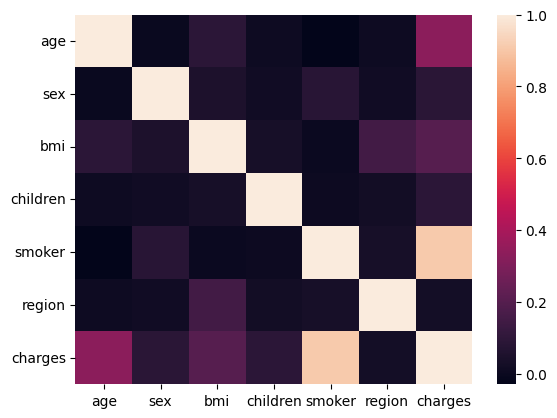

In [17]:
# Heatmap
import seaborn as sns

normalized_data = normalize_data(df.copy())
sns.heatmap(normalized_data.corr())

# Apply machine learning model

## Train-test split

In [18]:
def prepare_X_y(df):
    ## Split X, y from dataset
    columns = df.columns.tolist()     # Columns name
    columns.remove('charges')           # Remove y label (column charges in this case)
    # columns = ["smoker_yes", "bmi", "age"]
    X = df[columns]        # X 
    y = df.charges          # y
    return X, y

X, y = prepare_X_y(normalized_data)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

trainX, testX ,trainY, testY = split_train_test(X, y)

Training:(41485, 6)
Test:(17780, 6)


## Basic Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)   
    model.fit(trainX, trainY) 

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  96.90734459801116
mean absolute error of linear model on test set  107.92888520678032
[  251.0487518     48.08034384   286.38031141   538.74271558
 23650.08841381  -317.54787105]

-10384.880782317252


## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [21]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  143.0713989082978
mean absolute error of linear model (with poly transform) on test set  152.94247921350606


degree of PolynomialFeatures function is defined by a tuple (x, y) where x is the smallest degree, y is the largest degree, if we only input 1 value t, the function will understand x = 0 and y = t

> Indented block
* if the 2nd order with 1 feature is $X_1$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_1^2$$
* if the 2nd order with 2 features is $X_1$ and $X_2$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_2+\theta_3*X_1^2 + \theta_4*X_2^2 + \theta_5*X_1*X_2$$

In [22]:
# --- To get output of polynomial model
# We can call its name
linear_model = poly_model["linearregression"]
# or by number
linear_model = poly_model[1]

# Bonus (Visualization)

In [24]:
!pip install scikit-learn-intelex


     -------------------------------------- 113.2/113.2 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 11.5/11.5 MB 677.1 kB/s eta 0:00:00
     --------------------------------------- 51.5/51.5 MB 10.2 MB/s eta 0:00:00
     ------------------------------------- 283.8/283.8 kB 18.2 MB/s eta 0:00:00


In [25]:
from sklearn.manifold import TSNE

# Split X, y from dataset
columns = normalized_data.columns.tolist()     # Columns name
draw_data = normalized_data[columns]        # X 


In [26]:
from timeit import default_timer as timer
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [27]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [30]:
from sklearn.manifold import TSNE

params = {
    'n_components': 1,
    'random_state': 42
}
start = timer()
tsne = TSNE(**params)
embedding_intelex = tsne.fit_transform(draw_data)
time_opt = timer() - start

print(f"Intel® extension for Scikit-learn time: {time_opt:.2f} s")
print(f"Intel® Extension for scikit-learn. Divergence: {tsne.kl_divergence_}")

Intel® extension for Scikit-learn time: 93.21 s
Intel® Extension for scikit-learn. Divergence: 3.7481765747070312


In [34]:
draw_data = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3).fit_transform(draw_data)

In [35]:
from sklearn.model_selection import train_test_split
draw_train_X, draw_test_X ,trainY, testY = train_test_split(draw_data, y, train_size=0.70, random_state=2023)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(41485, 6)
Test:(17780, 6)


In [36]:
#model basic 
model = LinearRegression(fit_intercept=True)   
model.fit(draw_train_X, trainY)
pred = model.predict(draw_train_X)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )

#model polinomial 
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(draw_train_X, trainY)
poly_pred = poly_model.predict(draw_train_X)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )


mean absolute error of linear model on train set  7777.425788090987
mean absolute error of linear model (with poly transform) on train set  6871.498578188693


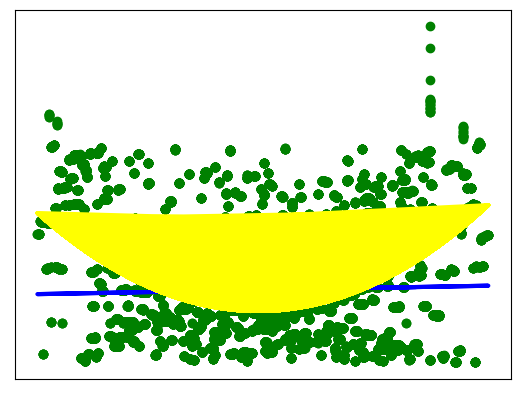

In [37]:
import matplotlib.pyplot as plt

plt.scatter(draw_train_X, trainY, color="g")
plt.plot(draw_train_X, pred, color="blue", linewidth=3)
plt.plot(draw_train_X, poly_pred, color="yellow", linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)